In [253]:
#Wholesale modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Specific Methods
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from IPython.display import display as dsp

In [254]:
def print_file(path, num):
    i = 0
    while i < num:
        for line in open(path):
            print(line)
            i += 1        
            
def parsefile(path, head = False):
    df = pd.read_csv(path, delimiter = '\t', header = None)
    df.rename(columns = {0: 'Review', 1:'Positive'}, inplace = True)
    df['Positive'] = (df['Positive'] == 1)
    if head == True:
        dsp(df.head())
    
    return df

def keyword_columnate(df, keywords):
    resultant = df[['Review','Positive']]
    for key in keywords:
        resultant[str(key)] = resultant['Review'].str.contains(str(key), case = False)
        
    return resultant

    
def print_reviews(df):
    for entry in df['Review']:
        print(entry)
        
def print_pos_neg_len(df):
    print('Number of positives: {}\nNumber of negatives: {}'.format(df[df['Positive'] == True]['Positive'].count(),
                                                                df[df['Positive'] == False]['Positive'].count()))
    print('Number of Data Points: {}'.format(df.shape[0]))

def print_mislabeled(data, target, y_pred):
        print("Number of mislabeled points out of a total {} points : {}\n".format(
        data.shape[0],
        (target != y_pred).sum()
    ), '\n')

def print_confusion_matrix(target, y_pred):
    print('Confusion Matrix:\n')
    print(confusion_matrix(target, y_pred),'\n')

def print_train_test(bnb, data, target, size):
    X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = size, random_state = 101) #rnd_st is random seed
    print('On {}% holdout sample: {}% accuracy.\n'.format(size * 100, str(
        round(bnb.fit(X_train, Y_train).score(X_test, Y_test),2))), '\n')

def print_cross_valid(bnb, data, target, folds):
    print('Cross Validation Scores with {} Folds:\n'.format(folds))
    print(cross_val_score(bnb, data, target, cv = folds), '\n')


In [255]:
#Classifier Definitions
        
def classifier_one(dataframe, keywords, print_frame = False, heatmap = False, print_perf = True, title = None):
    
    print('Keywords:\n{}'.format(keywords))
    df = keyword_columnate(dataframe, keywords)
    
    data = df[keywords]
    target = df['Positive']
    
    if print_frame == True:
        print('{} Review Frame'.format(title))
        dsp(df.head())
        
    if heatmap == True:
        sns.heatmap(df.corr())
        plt.title('{} Review Heatmap'.format(title))
        plt.show()

    #Bernoulli Naive Bayes Classifier
    bnb = BernoulliNB()
    bnb.fit(data, target)
    y_pred = bnb.predict(data)
    
    if print_perf == True:
        print('Classifier Performance:\n')
        print_mislabeled(data, target, y_pred)
        print_confusion_matrix(target, y_pred)
        print_train_test(bnb, data, target, 0.2)
        print_cross_valid(bnb, data, target, 5)

__Clasification__
What happens when we only use 'positive' words to classify the reviews?

,Review,Positive
0,Wow... Loved this place.,True
1,Crust is not good.,False
2,Not tasty and the texture was just nasty.,False
3,Stopped by during the late May bank holiday of...,True
4,The selection on the menu was great and so wer...,True


,Review,Positive
0,"A very, very, very slow-moving, aimless movie ...",False
1,Not sure who was more lost - the flat characte...,False
2,Attempting artiness with black & white and cle...,False
3,Very little music or anything to speak of.,False
4,The best scene in the movie was when Gerardo i...,True


Keywords:
['know', 'back', 'so', 'good', 'best', 'love', 'wonderful', 'perfect', 'stars', 'nice', 'like', 'complete']
Yelp Review Frame


,Review,Positive,know,back,so,good,best,love,wonderful,perfect,stars,nice,like,complete
0,Wow... Loved this place.,True,False,False,False,False,False,True,False,False,False,False,False,False
1,Crust is not good.,False,False,False,False,True,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,True,False,False,False,False,False,True,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,True,False,False,True,False,False,False,False,False,False,False,False,False


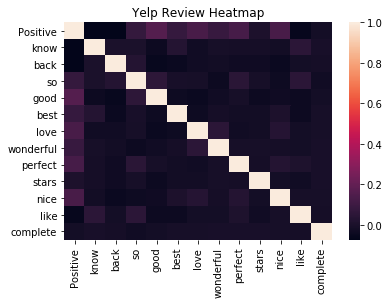

Classifier Performance:

Number of mislabeled points out of a total 1000 points : 373
 

Confusion Matrix:

[[405  95]
 [278 222]] 

On 20.0% holdout sample: 0.69% accuracy.
 

Cross Validation Scores with 5 Folds:

[0.605 0.63  0.62  0.615 0.645] 

Keywords:
['know', 'back', 'so', 'good', 'best', 'love', 'wonderful', 'perfect', 'stars', 'nice', 'like', 'complete']
IMDB Review Frame


,Review,Positive,know,back,so,good,best,love,wonderful,perfect,stars,nice,like,complete
0,"A very, very, very slow-moving, aimless movie ...",False,False,False,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,True,False,False,True,False,True,False,False,False,False,False,False,False


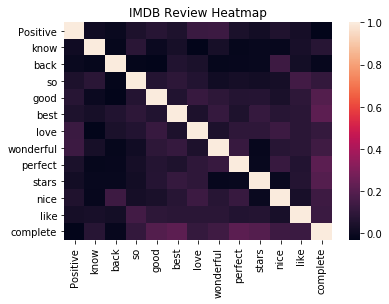

Classifier Performance:

Number of mislabeled points out of a total 748 points : 311
 

Confusion Matrix:

[[267  95]
 [216 170]] 

On 20.0% holdout sample: 0.63% accuracy.
 

Cross Validation Scores with 5 Folds:

[0.53642384 0.6        0.51006711 0.63758389 0.55704698] 



In [256]:
df = parsefile('data/yelp_labelled.txt', head = True)
imdb = parsefile('data/imdb_labelled.txt', head = True)

keywords_good = ['know','back','so','good', 'best','love', 'wonderful', 'perfect', 'stars','nice', 'like', 'complete']

classifier_one(df, keywords_good, True, True, title = 'Yelp')
classifier_one(imdb, keywords_good, True, True, title = 'IMDB')

Keywords:
['bad', 'terrible', 'slow', 'boring', 'long', 'not']
Yelp Review Frame


,Review,Positive,bad,terrible,slow,boring,long,not
0,Wow... Loved this place.,True,False,False,False,False,False,False
1,Crust is not good.,False,False,False,False,False,False,True
2,Not tasty and the texture was just nasty.,False,False,False,False,False,False,True
3,Stopped by during the late May bank holiday of...,True,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,True,False,False,False,False,False,False


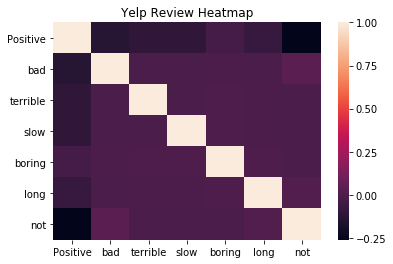

Classifier Performance:

Number of mislabeled points out of a total 1000 points : 375
 

Confusion Matrix:

[[147 353]
 [ 22 478]] 

On 20.0% holdout sample: 0.61% accuracy.
 

Cross Validation Scores with 5 Folds:

[0.59  0.61  0.645 0.665 0.61 ] 

Keywords:
['bad', 'terrible', 'slow', 'boring', 'long', 'not']
IMDB Review Frame


,Review,Positive,bad,terrible,slow,boring,long,not
0,"A very, very, very slow-moving, aimless movie ...",False,False,False,True,False,False,False
1,Not sure who was more lost - the flat characte...,False,False,False,False,False,False,True
2,Attempting artiness with black & white and cle...,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,True,False,False,False,False,False,False


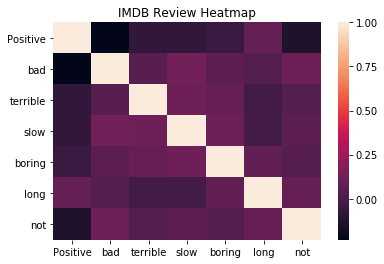

Classifier Performance:

Number of mislabeled points out of a total 748 points : 280
 

Confusion Matrix:

[[108 254]
 [ 26 360]] 

On 20.0% holdout sample: 0.59% accuracy.
 

Cross Validation Scores with 5 Folds:

[0.63576159 0.62       0.63758389 0.61073826 0.62416107] 



In [257]:
keywords_bad = ['bad', 'terrible', 'slow', 'boring', 'long', 'not']

classifier_one(df, keywords_bad, True, True, title = 'Yelp')
classifier_one(imdb, keywords_bad, True, True, title = 'IMDB')

Keywords:
['know', 'back', 'so', 'good', 'best', 'love', 'wonderful', 'perfect', 'stars', 'nice', 'like', 'complete', 'bad', 'terrible', 'slow', 'boring', 'long', 'not', 'and', 'the']
Yelp Review Frame


,Review,Positive,know,back,so,good,best,love,wonderful,perfect,...,like,complete,bad,terrible,slow,boring,long,not,and,the
0,Wow... Loved this place.,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,Not tasty and the texture was just nasty.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
3,Stopped by during the late May bank holiday of...,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,True
4,The selection on the menu was great and so wer...,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


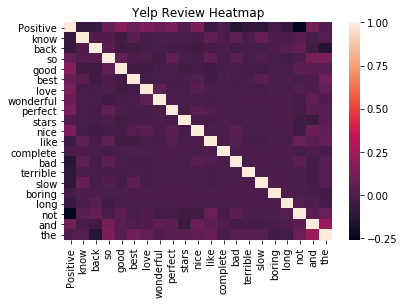

Classifier Performance:

Number of mislabeled points out of a total 1000 points : 324
 

Confusion Matrix:

[[368 132]
 [192 308]] 

On 20.0% holdout sample: 0.72% accuracy.
 

Cross Validation Scores with 5 Folds:

[0.675 0.65  0.7   0.67  0.66 ] 

Keywords:
['know', 'back', 'so', 'good', 'best', 'love', 'wonderful', 'perfect', 'stars', 'nice', 'like', 'complete', 'bad', 'terrible', 'slow', 'boring', 'long', 'not', 'and', 'the']
IMDB Review Frame


,Review,Positive,know,back,so,good,best,love,wonderful,perfect,...,like,complete,bad,terrible,slow,boring,long,not,and,the
0,"A very, very, very slow-moving, aimless movie ...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
2,Attempting artiness with black & white and cle...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,Very little music or anything to speak of.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,True,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


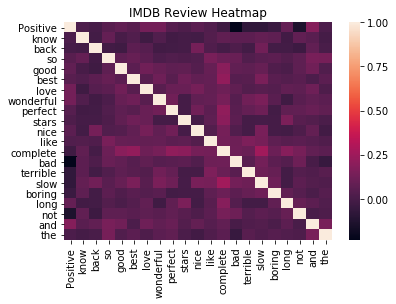

Classifier Performance:

Number of mislabeled points out of a total 748 points : 254
 

Confusion Matrix:

[[260 102]
 [152 234]] 

On 20.0% holdout sample: 0.66% accuracy.
 

Cross Validation Scores with 5 Folds:

[0.61589404 0.66666667 0.62416107 0.69798658 0.66442953] 



In [259]:
keywords_mixed = keywords_good + keywords_bad + ['and', 'the']

classifier_one(df, keywords_mixed, True, True, title = 'Yelp')
classifier_one(imdb, keywords_mixed, True, True, title = 'IMDB')